In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.style.use("seaborn-darkgrid")

In [171]:
# Creating Data for the regression
x = np.arange(1000)*10+267*np.random.uniform(0.05,0.5,1000)
y = np.arange(100, 1100)*np.random.uniform(0.4,0.8,1000)
df = pd.DataFrame({"x": x, "y":y})

In [172]:
# regression formula
def regression(df):
    x = df.x
    y = df.y
    m = (np.sum(x*y)-df.shape[0]*y.mean()*x.mean())/(np.sum(x**2)-df.shape[0]*(x.mean())**2)
    t = y.mean() - m * x.mean()
    return t, m

# calculating r^2
def rsquare(df_train, df_test):
    t, m = regression(df_train)
    x = df_train.x
    y = df_train.y
    ypred = m*x+t
    return 1-(np.sum((y-ypred)**2))/(np.sum((y-y.mean())**2))

In [192]:
for i in range(3):
    
    # shuffling the df
    df = df.sample(frac=1)

    # splitting into train and test data
    df_train, df_test = df[:int(0.7*len(df))], df[int(0.7*len(df)):]

    # fitting the linear regression model
    reg = linear_model.LinearRegression()
    reg.fit(df_train.x[:, np.newaxis], df_train.y[:, np.newaxis])

    # comparing r^2 
    print("Iteration", i, ":")
    print("self-written rsquare function:".ljust(35), rsquare(df_train, df_test))
    print("sklearn rsquare:".ljust(35), reg.score(df_train.x[:, np.newaxis], df_train.y[:, np.newaxis]))
    print()

Iteration 0 :
self-written rsquare function:      0.8309473787531042
sklearn rsquare:                    0.8309473787531042

Iteration 1 :
self-written rsquare function:      0.8288831277914304
sklearn rsquare:                    0.8288831277914304

Iteration 2 :
self-written rsquare function:      0.8329822615320028
sklearn rsquare:                    0.8329822615320028



Explanation for $r^2$ :
* gives us information about how well the regression predictions approximate the real data points
* $r^2$ = 1: Regression prediction perfectly fits the datapoints

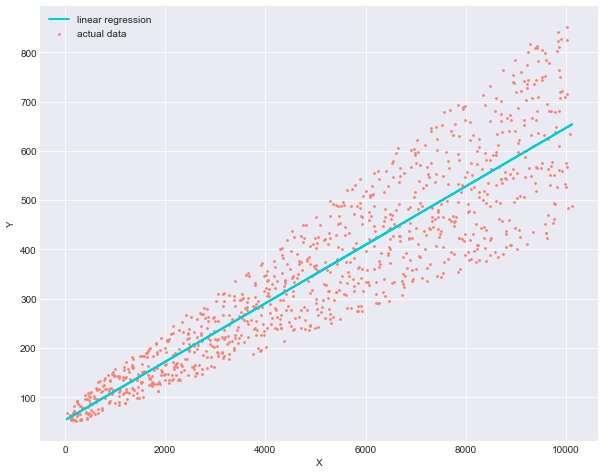

In [185]:
# plotting the data and the linear regression
t, m = regression(df_train)
fig = plt.figure(figsize=(10,8))
plt.plot(df.x, t+m*df.x, label="linear regression", color="darkturquoise", linewidth=2)
plt.scatter(df.x, df.y, color="salmon", s=3, label="actual data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=2)
plt.show()